# Comparison of different training datasets for scGEN

In [1]:
import pandas as pd
import numpy as np
import gc

import scanpy as sc

import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

import pertpy as pt
from pertpy.tools._metrics_3g import compare_dist, compare_de
from pertpy.tools import Distance

from scvi._settings import ScviConfig
config=ScviConfig()

In [2]:
path='/om2/user/khrovati/data/pertpy_reproducibility/model_comparison/scgen_species/'

## Prepare data
Download train_species and valid_species from https://drive.google.com/drive/folders/1v3qySFECxtqWLRhRTSbfQDFqdUCAXql3 (data reproducibility for scGEN) and merge them into single adata.

In [3]:
# Load and prepare datasets from the scGEN paper
adata=sc.concat([
    sc.read(path+'scgen_data/train_species.h5ad'),sc.read(path+'scgen_data/valid_species.h5ad')
])
adata.X=np.array(adata.X.todense())
adata

AnnData object with n_obs × n_vars = 77642 × 6619
    obs: 'condition', 'species', 'individual', 'batch', 'louvain', 'n_counts'
    obsm: 'X_pca', 'X_umap'

In [4]:
pd.crosstab(adata.obs.condition,adata.obs.species)

species,mouse,pig,rabbit,rat
condition,,,,
LPS6,9310,6031,8930,11743
unst,9515,10587,11088,10438


## Train models
Try to predict rat LPS6 from rat control given different training datasets that contain the three other individual species. 

In [ ]:
pred=dict()
for train_species in set(adata.obs.species.unique())-set(["rat" ]):
    print('\n',train_species)
    adata_sub=adata[
        ((adata.obs.species=='rat').values & (adata.obs.condition=='unst').values) |
        (adata.obs.species==train_species)
        ,:].copy()
    display(pd.crosstab(adata_sub.obs.condition,adata_sub.obs.species))
    pt.tl.SCGEN.setup_anndata(adata_sub, batch_key="condition", labels_key="species")
    # Repeat training with different seeds
    for i in range(3):
        config.seed=i
        scgen_model = pt.tl.SCGEN(adata_sub)
        scgen_model.train(
            max_epochs=100,
            #accelerator="auto",
            use_gpu=True
        )
        scgen_model.save(path+f"model_{train_species}_{i}.pt", overwrite=True)
        pred[train_species+'_'+str(i)] = scgen_model.predict(
            ctrl_key="unst", stim_key="LPS6", celltype_to_predict="rat")[0]
        pred[train_species+'_'+str(i)].write(path+f"pred_{train_species}_{i}.h5ad")
        gc.collect()


 pig


species,pig,rat
condition,,
LPS6,6031,0
unst,10587,10438


[rank: 0] Global seed set to 0
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 100/100: 100%|██████████| 100/100 [1:00:20<00:00, 35.89s/it, v_num=1, train_loss_step=6.35e+3, train_loss_epoch=2.6e+4]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 100/100: 100%|██████████| 100/100 [1:00:20<00:00, 36.20s/it, v_num=1, train_loss_step=6.35e+3, train_loss_epoch=2.6e+4]
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


[rank: 0] Global seed set to 1
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 100/100: 100%|██████████| 100/100 [1:00:06<00:00, 35.63s/it, v_num=1, train_loss_step=7.21e+3, train_loss_epoch=2.6e+4]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 100/100: 100%|██████████| 100/100 [1:00:06<00:00, 36.07s/it, v_num=1, train_loss_step=7.21e+3, train_loss_epoch=2.6e+4]
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


[rank: 0] Global seed set to 2
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 100/100: 100%|██████████| 100/100 [59:58<00:00, 35.96s/it, v_num=1, train_loss_step=6.3e+3, train_loss_epoch=2.6e+4] 

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 100/100: 100%|██████████| 100/100 [59:58<00:00, 35.99s/it, v_num=1, train_loss_step=6.3e+3, train_loss_epoch=2.6e+4]
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             

 mouse


species,mouse,rat
condition,,
LPS6,9310,0
unst,9515,10438


[rank: 0] Global seed set to 0
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 100/100: 100%|██████████| 100/100 [1:03:50<00:00, 38.30s/it, v_num=1, train_loss_step=2.31e+4, train_loss_epoch=3.2e+4]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 100/100: 100%|██████████| 100/100 [1:03:50<00:00, 38.31s/it, v_num=1, train_loss_step=2.31e+4, train_loss_epoch=3.2e+4]
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


[rank: 0] Global seed set to 1
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 100/100: 100%|██████████| 100/100 [1:01:48<00:00, 36.50s/it, v_num=1, train_loss_step=2.55e+4, train_loss_epoch=3.19e+4]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 100/100: 100%|██████████| 100/100 [1:01:48<00:00, 37.09s/it, v_num=1, train_loss_step=2.55e+4, train_loss_epoch=3.19e+4]
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


[rank: 0] Global seed set to 2
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 100/100: 100%|██████████| 100/100 [1:05:34<00:00, 42.41s/it, v_num=1, train_loss_step=2.28e+4, train_loss_epoch=3.19e+4]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 100/100: 100%|██████████| 100/100 [1:05:34<00:00, 39.34s/it, v_num=1, train_loss_step=2.28e+4, train_loss_epoch=3.19e+4]
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             

 rabbit


species,rabbit,rat
condition,,
LPS6,8930,0
unst,11088,10438


[rank: 0] Global seed set to 0
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 100/100: 100%|██████████| 100/100 [1:19:05<00:00, 47.02s/it, v_num=1, train_loss_step=4.86e+3, train_loss_epoch=3.38e+4]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 100/100: 100%|██████████| 100/100 [1:19:05<00:00, 47.45s/it, v_num=1, train_loss_step=4.86e+3, train_loss_epoch=3.38e+4]
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


[rank: 0] Global seed set to 1
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 100/100: 100%|██████████| 100/100 [1:15:22<00:00, 44.73s/it, v_num=1, train_loss_step=5.49e+3, train_loss_epoch=3.38e+4]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 100/100: 100%|██████████| 100/100 [1:15:22<00:00, 45.22s/it, v_num=1, train_loss_step=5.49e+3, train_loss_epoch=3.38e+4]
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


[rank: 0] Global seed set to 2
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 100/100: 100%|██████████| 100/100 [1:17:25<00:00, 46.03s/it, v_num=1, train_loss_step=4.13e+3, train_loss_epoch=3.38e+4]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 100/100: 100%|██████████| 100/100 [1:17:25<00:00, 46.45s/it, v_num=1, train_loss_step=4.13e+3, train_loss_epoch=3.38e+4]
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
INFO     Received view of anndata, making copy.                                                                    


## Metrics
Compute different metrics to evaluate prediction performance

In [4]:
# Reload expression predictions
if False:
    pred={}
    for train_species in set(adata.obs.species.unique())-set(["rat" ]):
        for i in range(3):
            pred[train_species+'_'+str(i)]=sc.read(path+f"pred_{train_species}_{i}.h5ad")

In [5]:
# Compute metrics - not not all used for plot for the paper
metrics=[]
for train_species,pred_adata in pred.items():
    
    train_species,seed = train_species.split('_')
    metrics_sub={'train_species':train_species}
    target=adata[adata.obs.query('condition=="LPS6" & species=="rat"').index,:].X
    predicted=pred_adata.X
    reference=adata[adata.obs.query('condition=="unst" & species=="rat"').index,:].X
    
    metrics_sub['dist_mean_target']=Distance(metric='euclidean')(target,predicted)
    metrics_sub['dist_mean_ref']=Distance(metric='euclidean')(reference,predicted)
    
    de_result = compare_de(target, predicted, reference, 100, method='wilcoxon')
    metrics_sub['deg_shared'] = de_result['shared_top_genes']
    metrics_sub['deg_corr'] = de_result['scores_corr']
    metrics_sub['deg_ranks_corr'] = de_result['scores_ranks_corr']
    
    metrics_sub['dist_mean_rel']=compare_dist(target,predicted,reference, kind='scaled')
    metrics_sub['dist_distnMeanVar']=Distance(metric='mean_var_distn')(target,predicted)
    
    metrics.append(metrics_sub)
metrics=pd.DataFrame(metrics)
metrics.to_csv(path+'metrics.tsv',sep='\t',index=False)

In [4]:
# Reload metrics
if False:
    metrics=pd.read_table(path+'metrics.tsv',sep='\t')

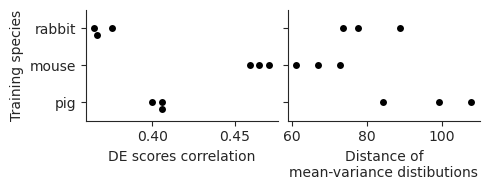

In [14]:
# Plot for the paper
cols=2
fig,axs=plt.subplots(1,cols,figsize=(2.5*cols,2),sharey=True)
for idx,(metric, metric_name) in enumerate([
    ('deg_ranks_corr','DE scores correlation'),
    ('dist_distnMeanVar','Distance of\nmean-variance distibutions')
]):
    ax=axs[idx]
    sns.swarmplot(y='train_species',x=metric,data=metrics,ax=ax, c='k')
    ax.set_xlabel(metric_name)
    ax.set_ylabel('Training species')
    ax.set(facecolor = (0,0,0,0))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
fig.tight_layout()
fig.set(facecolor = (0,0,0,0))
plt.subplots_adjust( wspace=0.05)

# Save
path_fig=path+'figures/metrics-swarm'
plt.savefig(path_fig+'.pdf', dpi=300,bbox_inches='tight')
plt.savefig(path_fig+'.png',dpi=300,bbox_inches='tight')

### Other metrics - UNUSED
Other computed metrics taht may not perform so well so will be omitted from the paper.

The relative distance of means (scale data based on ref and target and then compute d(target,pred)/d(ref,pred)) is probably biased - e.g. if pred is in somewhat different direction than targetrelative to the ref then d(ref,pred) will be large and d(target,pred) small, giving overall small ratio, while pred in between ref and target would give larger ratio as d(ref,pred) would be small. However, prediction that is interpolated, even if not reaching the target, rather than being in the wrong direction should actually be prioritized. (See also the pertpy tutorial). To inspect this further, I also checked the d(target,pred) and d(ref,pred) separatelly (scatterplot), but this does not show the above mentioned pattern (e.g. pig pred is relatively close to target but in different dirrection from ref than the target). Maybe related to scaling as the later two metrics were computed on unscaled data, thus giving focus to different genes.

Text(-30.40277777777778, 0.5, 'Training species')

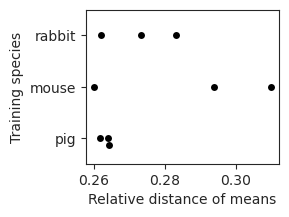

In [8]:
rcParams['figure.figsize']=(2.5,2)
ax=sns.swarmplot(y='train_species',x='dist_mean_rel',data=metrics, c='k')
ax.set_xlabel('Relative distance of means')
ax.set_ylabel('Training species')

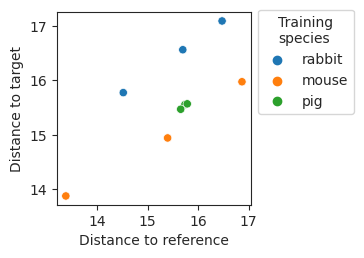

In [23]:
rcParams['figure.figsize']=(2.5,2.5)
ax=sns.scatterplot(y='dist_mean_target',x='dist_mean_ref',hue='train_species',data=metrics)
ax.set_xlabel('Distance to reference')
ax.set_ylabel('Distance to target')
ax.legend(bbox_to_anchor=(1,1.05),title='Training\nspecies')